 ## DATA PREPROCESSING

In [2]:
import cv2,os

data_path=r'C:\Users\ilaki\Downloads\dataset-FACE\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)

In [4]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [5]:
np.save('data',data)
np.save('target',new_target)

In [6]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

## TRAINING THE Convolutional Neural Network Architecture

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7252 - accuracy: 0.5818

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 24s 746ms/step - loss: 0.7252 - accuracy: 0.5818 - val_loss: 0.6654 - val_accuracy: 0.5806
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5352 - accuracy: 0.7384

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 22s 721ms/step - loss: 0.5352 - accuracy: 0.7384 - val_loss: 0.3870 - val_accuracy: 0.8306
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3359 - accuracy: 0.8566

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 23s 757ms/step - loss: 0.3359 - accuracy: 0.8566 - val_loss: 0.3413 - val_accuracy: 0.8468
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.9303

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 23s 760ms/step - loss: 0.2008 - accuracy: 0.9303 - val_loss: 0.1992 - val_accuracy: 0.9315
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9556

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 24s 770ms/step - loss: 0.1379 - accuracy: 0.9556 - val_loss: 0.1922 - val_accuracy: 0.9355
Epoch 6/20
31/31 [==============================] - 23s 746ms/step - loss: 0.1432 - accuracy: 0.9475 - val_loss: 0.3401 - val_accuracy: 0.8750
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9556

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


31/31 [==============================] - 24s 772ms/step - loss: 0.1192 - accuracy: 0.9556 - val_loss: 0.1754 - val_accuracy: 0.9395
Epoch 8/20
31/31 [==============================] - 23s 743ms/step - loss: 0.0999 - accuracy: 0.9646 - val_loss: 0.1777 - val_accuracy: 0.9315
Epoch 9/20
31/31 [==============================] - 23s 758ms/step - loss: 0.0661 - accuracy: 0.9788 - val_loss: 0.2164 - val_accuracy: 0.8992
Epoch 10/20
31/31 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9838

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


31/31 [==============================] - 24s 764ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.1637 - val_accuracy: 0.9476
Epoch 11/20
31/31 [==============================] - 23s 739ms/step - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.2815 - val_accuracy: 0.9194
Epoch 12/20
31/31 [==============================] - 24s 788ms/step - loss: 0.0487 - accuracy: 0.9818 - val_loss: 0.2478 - val_accuracy: 0.9194
Epoch 13/20
31/31 [==============================] - 23s 736ms/step - loss: 0.0648 - accuracy: 0.9778 - val_loss: 0.1762 - val_accuracy: 0.9315
Epoch 14/20
31/31 [==============================] - 23s 735ms/step - loss: 0.0367 - accuracy: 0.9848 - val_loss: 0.3147 - val_accuracy: 0.9113
Epoch 15/20
31/31 [==============================] - 23s 738ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.1651 - val_accuracy: 0.9476
Epoch 16/20
31/31 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9879

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


31/31 [==============================] - 24s 775ms/step - loss: 0.0337 - accuracy: 0.9879 - val_loss: 0.1594 - val_accuracy: 0.9395
Epoch 17/20
31/31 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9899

INFO:tensorflow:Assets written to: model-017.model\assets


INFO:tensorflow:Assets written to: model-017.model\assets


31/31 [==============================] - 24s 778ms/step - loss: 0.0277 - accuracy: 0.9899 - val_loss: 0.1407 - val_accuracy: 0.9516
Epoch 18/20
31/31 [==============================] - 23s 747ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.1738 - val_accuracy: 0.9476
Epoch 19/20
31/31 [==============================] - 23s 739ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.2729 - val_accuracy: 0.9234
Epoch 20/20
31/31 [==============================] - 23s 737ms/step - loss: 0.0616 - accuracy: 0.9758 - val_loss: 0.1534 - val_accuracy: 0.9476


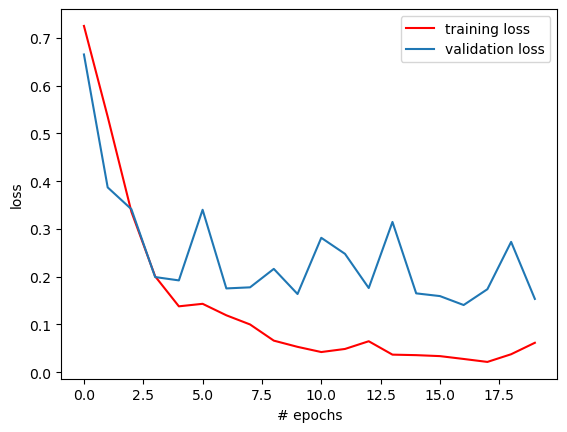

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

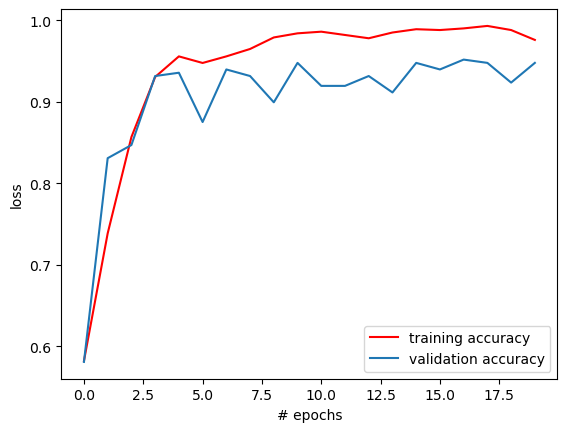

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 148ms/step - loss: 0.1358 - accuracy: 0.9638
[0.13581736385822296, 0.9637681245803833]


## Detecting Faces with and without masks

In [13]:
from keras.models import load_model
import cv2
import numpy as np

In [14]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()